In [2]:
library(conos)
source('lib.r')


In [2]:
# Fig.F1.v1
scon = readRDS('all.join.conos.rds')


In [3]:
# load cell annotations

load('cell.ano.RData')

In [7]:

genes = c('VEGFA','KRT8','KRT18','CA9','XCL1','VEGFA')
exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)
 
for ( i in genes){
a1=scon$plotGraph(colors=exp[i,],raster = TRUE,size=0.01,alpha=0.8,title=i)
ggsave(paste(i,'.exp.pdf'),a1,height=3.1,width=3)
}

[1]      6 114434

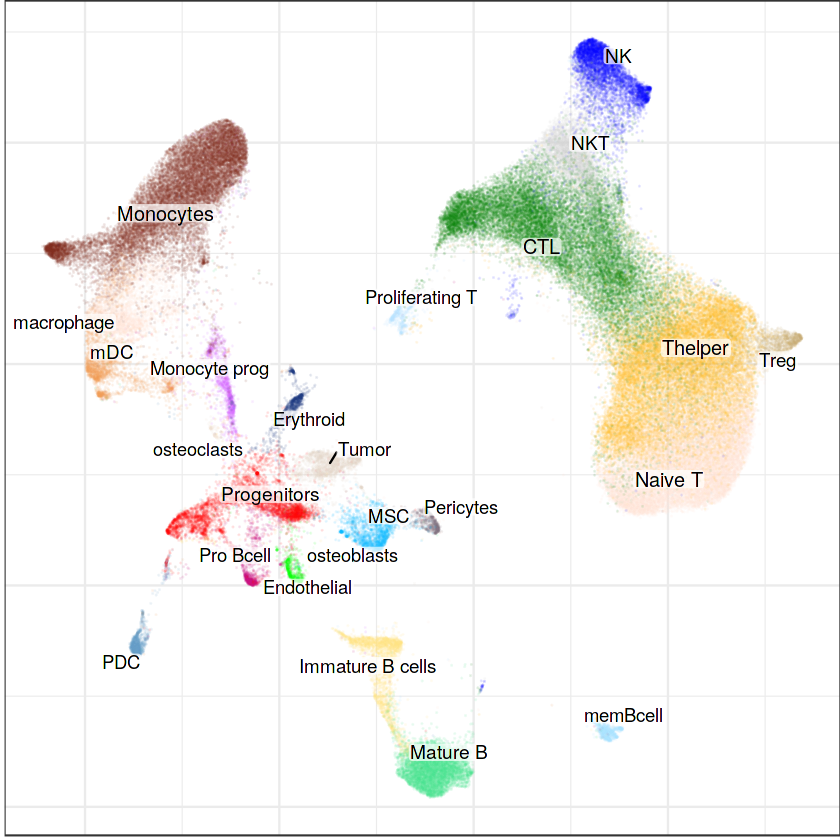

In [8]:
a1 = scon$plotGraph(groups = scon$misc$cell.type,size=0.05,raster = TRUE,alpha=0.07,plot.na=F,palette=anoM.palf,font.size = c(3.7,4.1))
a1

In [9]:
a1 = scon$plotGraph(groups = scon$misc$cell.type,size=0.01,raster = TRUE,alpha=0.04,plot.na=F,palette=anoM.palf,mark.groups = F)

ggsave('F1a.panel.pdf',a1,height=4,width=4)


Using SampleType as value column: use value.var to override.



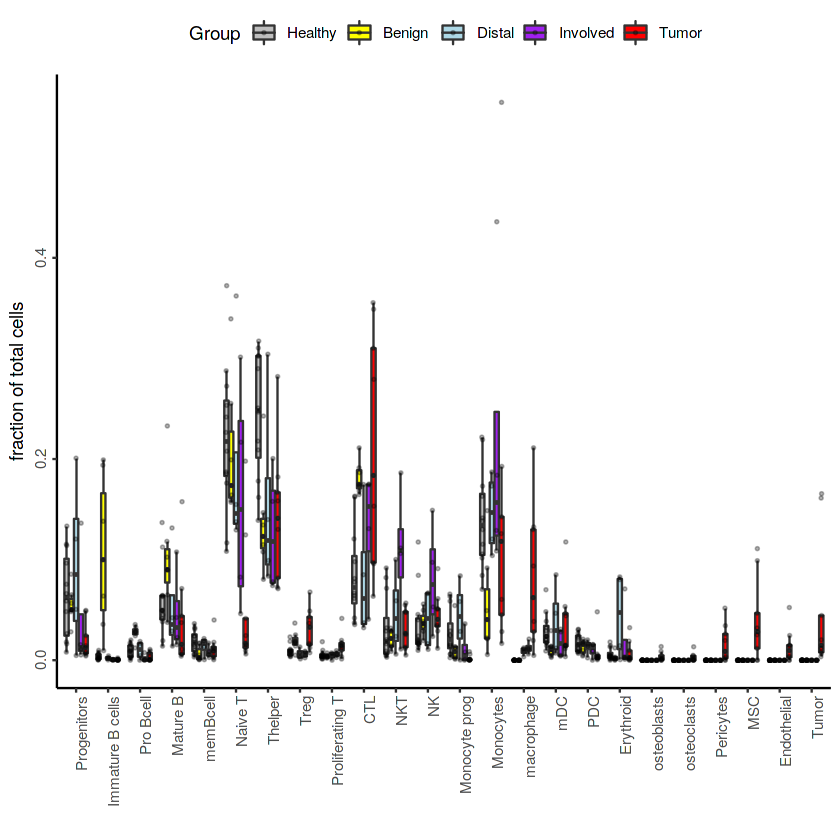

In [4]:

scon$misc$sample.groups = sample.group

fraction.palette1 = readRDS('../fraction.palette1.rds')

fig1 = cellProportion(scon,fraction.palette1=fraction.palette1)
fig1

In [14]:
tmp4 = readRDS('cell.fraction.data.rds')
ylab = 'fraction of total cells'
tmp4 = tmp4[tmp4$cell %in% c('macrophage','Proliferating T','CTL','Treg','Progenitors','Naive T','Thelper'),]
 p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
      theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+theme(legend.position="right") #+
    #  scale_fill_manual(values=fraction.palette1)
p=p+scale_fill_manual(values=fraction.palette1)+ylim(c(min(tmp4$pc.of.sample),max(tmp4$pc.of.sample)*1.4))
p=p+ stat_compare_means(label = "p.signif")

ggsave('subset.fraction.v2.pdf',p,height=3.2,width=4.7)


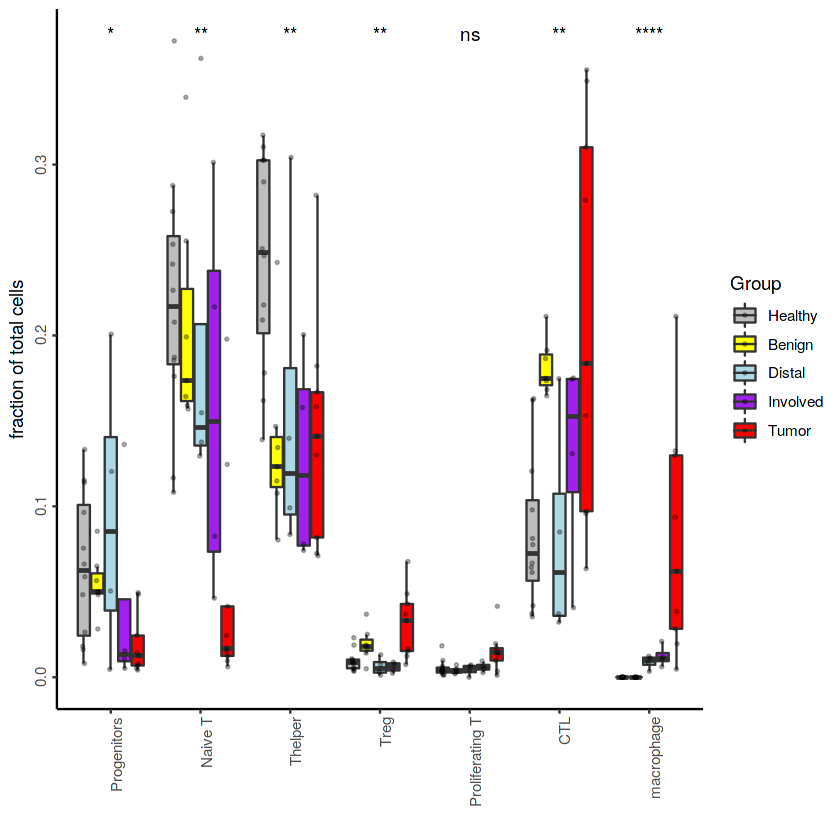

In [7]:
library(ggpubr)
p+ stat_compare_means(label = "p.signif")

In [ ]:
df = readRDS('cell.fraction.data.rds')


Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message:
“Using shapes for an ordinal variable is not advised”


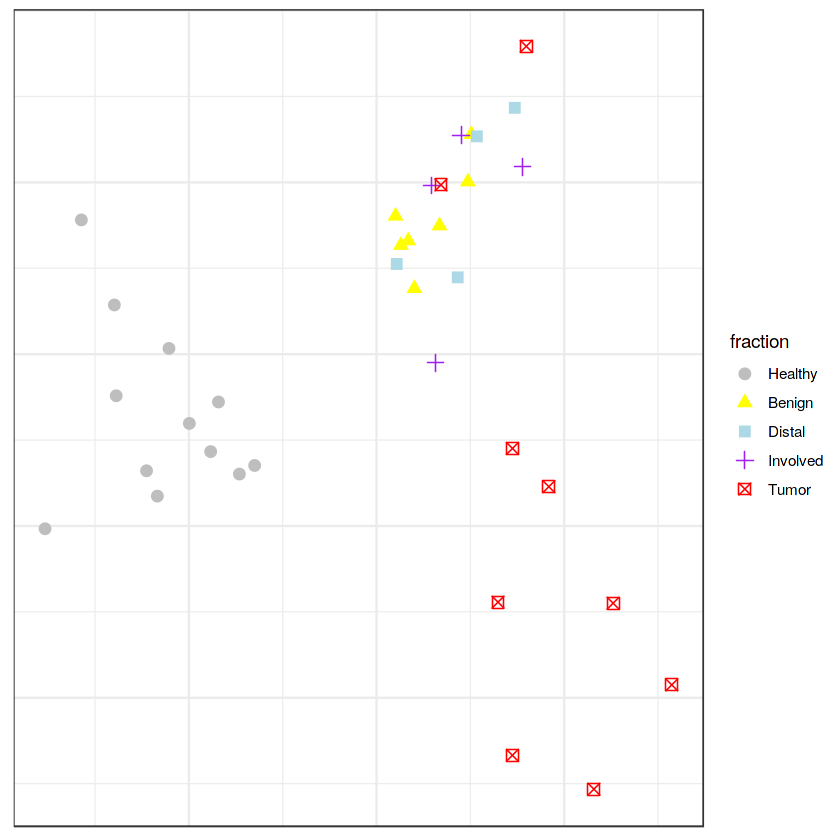

In [14]:
p1 <- ggplot(df,aes(x,y,color=fraction,shape=fraction)) + geom_point(size=3) + theme_bw();
p1=p1+guides(color=guide_legend(ncol=1))+
scale_color_manual(values=fraction.palette1)+
xlab('')+ylab('')+ theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank())

p1
ggsave('F1I.MDS.v3.pdf',p1,height=3,width=4)


Using SampleType as value column: use value.var to override.



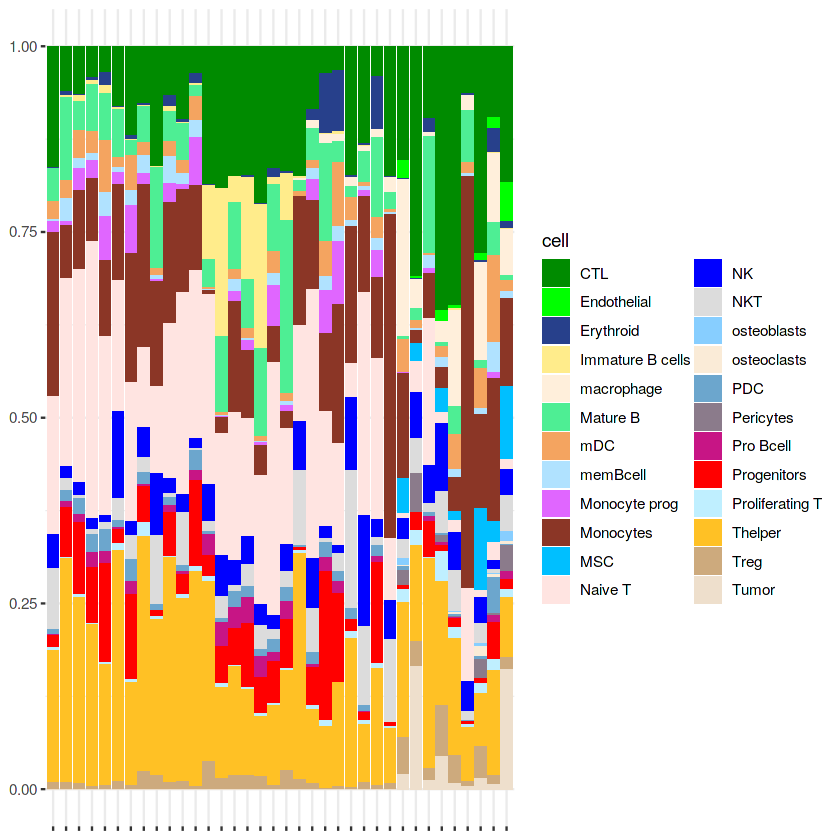

In [57]:
sample.groups = scon$misc$sample.groups
n1=sample.groups[sample.groups=='Healthy'] %>% names
n2=sample.groups[sample.groups=='Benign'] %>% names
n3=sample.groups[sample.groups=='Distal'] %>% names
n4=sample.groups[sample.groups=='Involved'] %>% names
n5=sample.groups[sample.groups=='Tumor'] %>% names



cname=names(anof)
#cname = cname[!grepl('Normal',cname)]
library(reshape2)
cells = scon$misc$cell.typel
ssamp = scon$misc$cell.sample

ssamp = ordered(as.factor(ssamp),levels =c(n1,n2,n3,n4,n5))

ano2=data.frame('Cell'=anof[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)


#head(tmp2)
# Normalise for the number of cells in each library
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
#head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')
#head(tmp4)


p=ggplot(tmp4, aes(x=sample, fill=cell, y = pc.of.sample)) +theme_bw()+
  geom_bar(stat='identity', position='fill') + 
  scale_fill_manual(values=anoM.pal)+
  theme(axis.text.x = element_blank(),
        axis.title.y=element_blank(),panel.border = element_blank(),
        axis.title.x=element_blank())+ylab('Proportion')#+theme(legend.position = 'none')

p  

#ggsave('f1c.normal.pdf',p,height=5,width=4)

#ggsave('f1c.barplot.pdf',p,height=5,width=8.7)



In [58]:
tmp4$group=sample.groups[Toch(tmp4$sample)]


tmp5 = data.frame('sample'=colnames(tmp3),'group'=sample.groups[colnames(tmp3)])
tmp5$sample = factor(tmp5$sample,levels = colnames(tmp3))

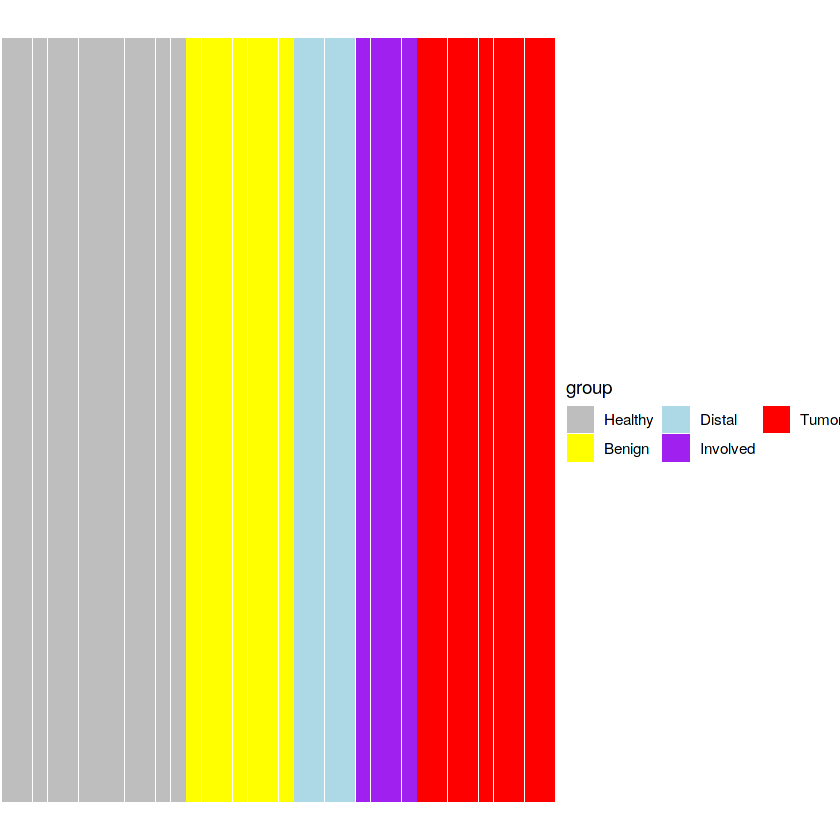

In [75]:
p0=ggplot(tmp5, aes(x=sample, y=1, fill=group)) +theme_classic() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + xlab("")  + ylab('frequence')+geom_bar(position=position_dodge(), stat="identity")+
        theme_void()+guides(fill=guide_legend(ncol=3))+
      theme(panel.spacing.x = unit(1, "mm"))+scale_fill_manual(values =fraction.palette1) #+theme(legend.position = 'none')


p0

In [60]:
legend <- plot_grid(get_legend(p0), get_legend(p), ncol = 1)
    p0 <- p0 + theme(legend.position = "none")
    p <- p + theme(legend.position = "none")

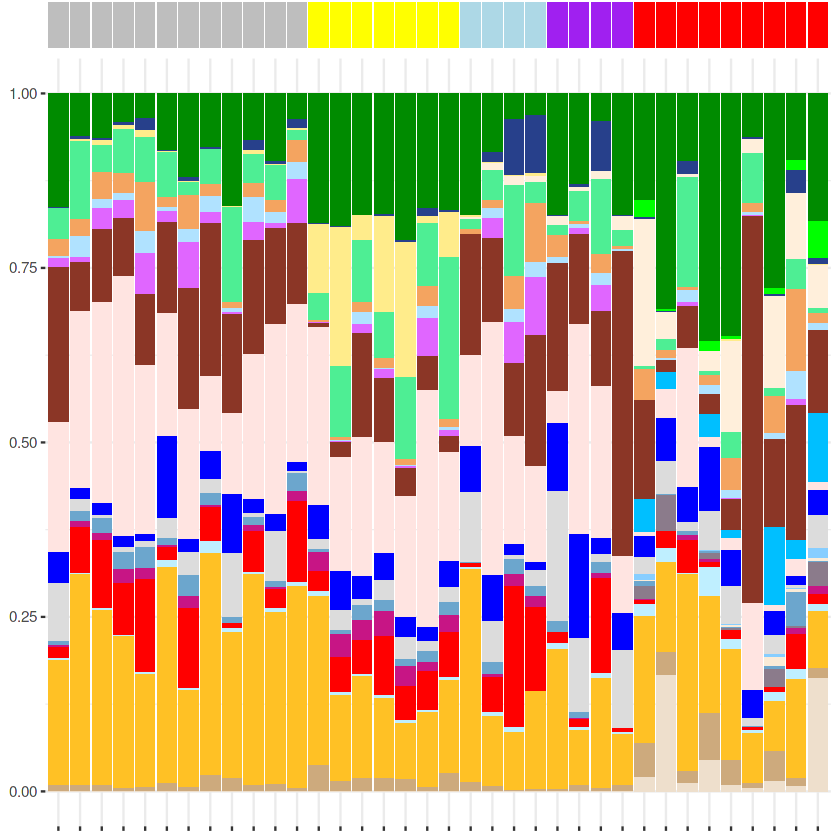

In [66]:
library(cowplot)
   plot <- plot_grid(p0, p, align = "v", ncol = 1, axis = "tb", rel_heights = c(1,16))
   plot

In [67]:
ggsave('S1E.pdf',plot,height=4,width=6)

[1]     34 114434

[1] "blue"
[1] "white"
[1] "red"


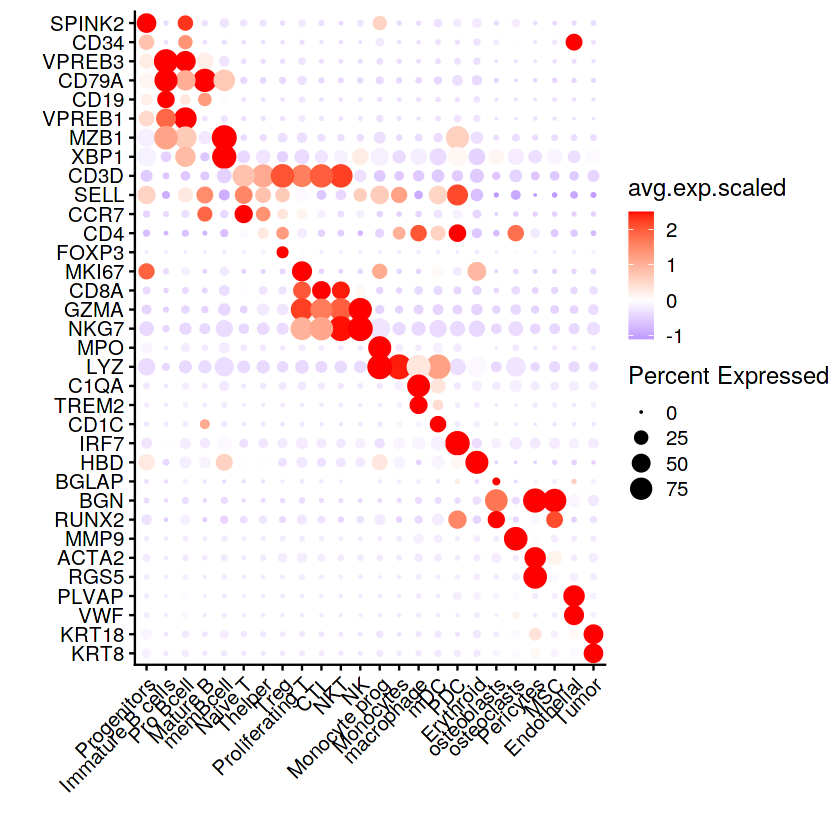

In [10]:
features=c("MS4A1","S100A9" ,"FCER1A" , "S100A8","TPSAB1" , "CPA3","C1QA",'C1QB' ,"DCN" ,   "LUM" ,  "C1QC",
                      "FXYD3"  , "KRT18"  , "KRT8" ,"RAMP2"  ,    "RNASE1"  ,   "EGFL7" , "VWF", "SMC4"  ,   "MKI67", "XBP1",
                      "CD8A","CD8B",'FOXP3','CTLA4',"NKG7", "GNLY" ,"NKG7" ,  "GNLY" , "CD79B",  "KLRD1","FCN1" ,"CD1C")

features=c("SPINK2","CD34" ,"VPREB3" , "CD79A","CD19" ,'VPREB1', "MZB1","XBP1",'CD3D' ,"SELL" ,'CCR7' , "CD4" ,  "FOXP3",
                      "MKI67" ,'CD8A','GZMA','NKG7'  ,"MPO"  , 'LYZ','C1QA' ,'TREM2',  "CD1C"  ,   "IRF7" , "HBD"  ,   "BGLAP", "BGN",'RUNX2',"MMP9",
                      "ACTA2","RGS5",'PLVAP','VWF', "KRT18"  , "KRT8")

library(cowplot)

anoT2 = scon$misc$cell.type %>% as.factor()
cname=names(anoT2)

exp <- do.call(rbind,lapply(sn(features),function(gene) conos:::getGeneExpression(scon,gene)))
exp[is.na(exp)]=0
dim(exp)


p=Dotfig(features,exp[,cname],anoT2[cname],cols = c("blue","white", "red"))+xlab('')+ylab('')
p
                  

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


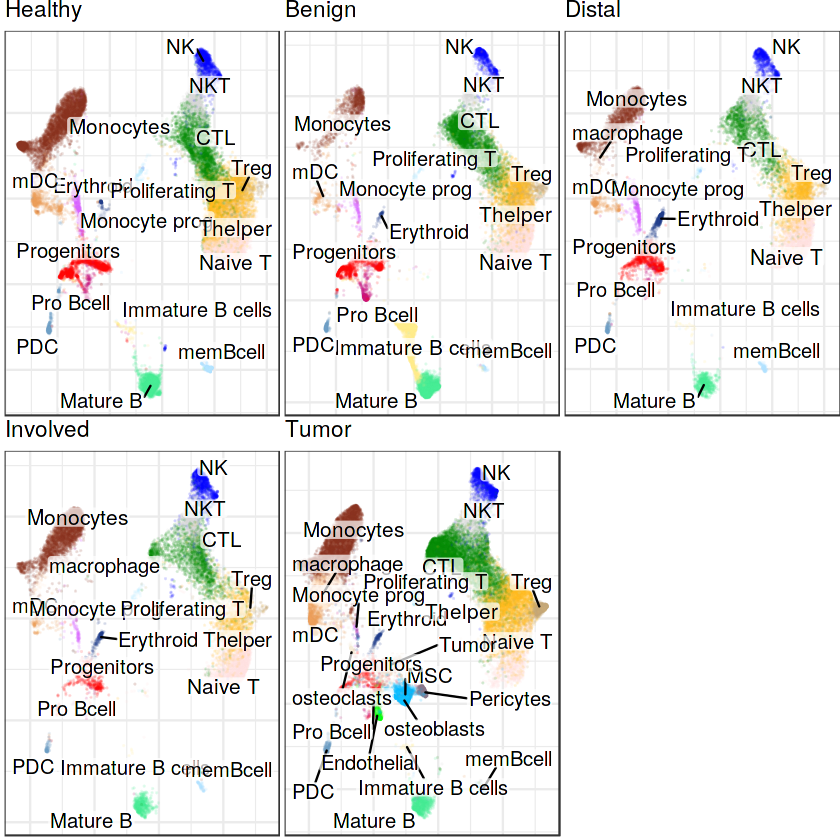

In [8]:
sample.g2 = scon$misc$sample.groups
anoM = anof
n1 = names(sample.g2[sample.g2=='Healthy'])
a4=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],raster  = TRUE,plot.na=F,palette=anoM.palf,size=0.1,alpha=0.1,font.size = c(4.1, 4.3),title='Healthy')


n1 = names(sample.g2[sample.g2=='Benign'])
a3=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],raster  = TRUE,plot.na=F,palette=anoM.palf,size=0.1,alpha=0.1,font.size = c(4.1, 4.3),title='Benign')


n1 = names(sample.g2[sample.g2=='Distal'])
a2=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],raster  = TRUE,plot.na=F,palette=anoM.palf,size=0.1,alpha=0.1,font.size = c(4.1, 4.3),title='Distal')


n1 = names(sample.g2[sample.g2=='Involved'])
a1=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],raster  = TRUE,plot.na=F,palette=anoM.palf,size=0.1,alpha=0.1,font.size = c(4.1, 4.3),title='Involved')

n1 = names(sample.g2[sample.g2=='Tumor'])
a5=scon$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],raster  = TRUE,plot.na=F,palette=anoM.palf,size=0.1,alpha=0.1,font.size = c(4.1, 4.3),title='Tumor')



b=  cowplot::plot_grid(plotlist=list(a4,a3,a2,a1,a5), ncol=3, nrow=2)
b

In [9]:
ggsave('S2.pdf',b,width = 12,height=8.4)